Below there is k-means alike algorithm implementation with comparing means, not comparing clusters.

In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import scipy.io
import copy


def kmeans(data, k):
   
    N = data.shape[0]
    numFeatures = data.shape[1]
    labels = -1*np.zeros(N)
    numIterationsCompleted = 0
    means = np.zeros((k,numFeatures))
    
    
    min = np.min(data)
    max = np.max(data)
    
    #Fill mean vector with random values
    for i in range(k):
        for f in range(numFeatures):
            means[i][f] = random.uniform(min, max)
    
     
    while(True): 
        for i in range(N):
            distmin = (np.linalg.norm(data[i] - means[0]))**2
            minindex = 0
            for j in range(k):
                #Find distance to each mean. Take the smallest one.
                #distcurrent = np.linalg.norm(data[i] - means[j])
                distcurrent = (np.linalg.norm(data[i] - means[j]))**2
                if(distcurrent < distmin):
                    distmin = distcurrent
                    minindex = j
            labels[i] = minindex
    
        dum = True
        for i in range(k):
            datalabeli = data[np.where(labels == i)]
            newmeanforlabeli = np.mean(datalabeli,0)
            for f in range(numFeatures):
                dum = dum and (means[i][f] == newmeanforlabeli[f])
        if(dum == True):
            #Optimum Found!
            return labels, means
        else:
            for i in range(k):
                datalabeli = data[np.where(labels == i)]
                newmeanforlabeli = np.mean(datalabeli,0)
                means[i] = newmeanforlabeli
        numIterationsCompleted+=1

Below data is loaded and k-means is applied. Result is plotted.

<function matplotlib.pyplot.show>

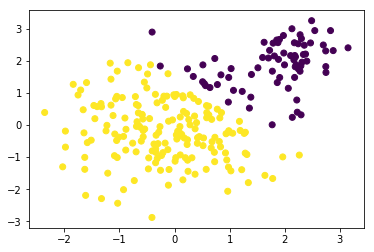

In [2]:
mat = scipy.io.loadmat('hw5_p1a.mat')
data = mat['X']
N = data.shape[0]
result = kmeans(data,2)
labels = result[0]
plt.scatter(data[:,0], data[:,1], c = labels)
plt.show


Below algorithm Gaussian RBF kernel is used for implementing k-means. It can cluster sets that can not be handled by linear methods.

In [3]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import scipy.io
import copy


def kmeansgaussiankernel(data, k):
   
    N = data.shape[0]
    numFeatures = data.shape[1]
    #print(N)
    labels = -1*np.zeros(N)
    for i in range(N):
        labels[i] = random.randint(0, k)
        
    numIterationsCompleted = 0
    means = np.zeros((k,numFeatures))
    
    
    min = np.min(data)
    max = np.max(data)
    
    #Fill mean vector with random values
    for i in range(k):
        for f in range(numFeatures):
            means[i][f] = random.uniform(min, max)
    
     
    while(True): 
        for i in range(N):
            
            firstTermWithSum = 0
            secondTermWithSum = 0
            for aj in np.where(labels == 0):
                    firstTermWithSum += (np.exp(-np.linalg.norm(data[0] - data[aj])**4)/ 0.08)
                    
            for aj in np.where(labels==0):
                    for al in np.where(labels==0):
                        secondTermWithSum += (np.exp(-np.linalg.norm(data[aj] - data[al])**4)/ 0.08) 
                        
            distmin = 1 - 2*firstTermWithSum/(np.where(labels==0)[0].shape[0]) + secondTermWithSum/((np.where(labels==0)[0].shape[0])**2)

            minindex = 0
            for j in range(k):
                #Find distance to each mean. Take the smallest one.
                #distcurrent = np.linalg.norm(data[i] - means[j])
                firstTermWithSum = 0
                secondTermWithSum = 0
                for aj in np.where(labels == j):
                    firstTermWithSum += (np.exp(-np.linalg.norm(data[i] - data[aj]))/ 0.08)
                    
                for aj in np.where(labels==j):
                    for al in np.where(labels==j):
                        secondTermWithSum += (np.exp(-np.linalg.norm(data[aj] - data[al]))/ 0.08)
                        
                distcurrent = 1 - 2*firstTermWithSum/(np.where(labels==j)[0].shape[0]) + secondTermWithSum/((np.where(labels==j)[0].shape[0])**2)
                if(distcurrent < distmin):
                    distmin = distcurrent
                    minindex = j
            labels[i] = minindex
    
        dum = True
        for i in range(k):
            datalabeli = data[np.where(labels == i)]
            newmeanforlabeli = np.mean(datalabeli,0)
            for f in range(numFeatures):
                dum = dum and (means[i][f] == newmeanforlabeli[f])
        if(dum == True):
            #Optimum Found!
            return labels, means
        else:
            for i in range(k):
                datalabeli = data[np.where(labels == i)]
                newmeanforlabeli = np.mean(datalabeli,0)
                means[i] = newmeanforlabeli
        numIterationsCompleted+=1

Data is loaded and clustered with kernel kmeans.

<function matplotlib.pyplot.show>

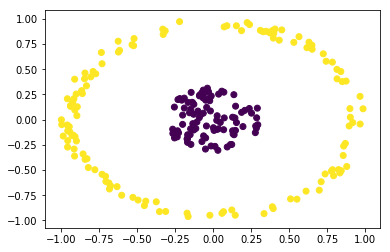

In [4]:
mat = scipy.io.loadmat('hw5_p1b.mat')
data = mat['X']
result = kmeansgaussiankernel(data,2)
labels = result[0]
plt.scatter(data[:,0], data[:,1], c = labels)
plt.show

Data is clustered with linear kmeans.

<function matplotlib.pyplot.show>

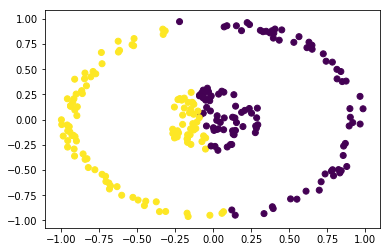

In [6]:
result = kmeans(data,2)
labels = result[0]
plt.scatter(data[:,0], data[:,1], c = labels)
plt.show